In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')


In [4]:
#Display the first few rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking for null/missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Fill missing values for Age with median
titanic_df['Age'].fillna(titanic_df['Age'].median())

#Fill missing values for Embarked with the most common value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

#Drop the Cabin column due to excessive missing values
titanic_df.drop(['Cabin','PassengerId', 'Name', 'Ticket'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
#encode categorical variables
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked']= titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

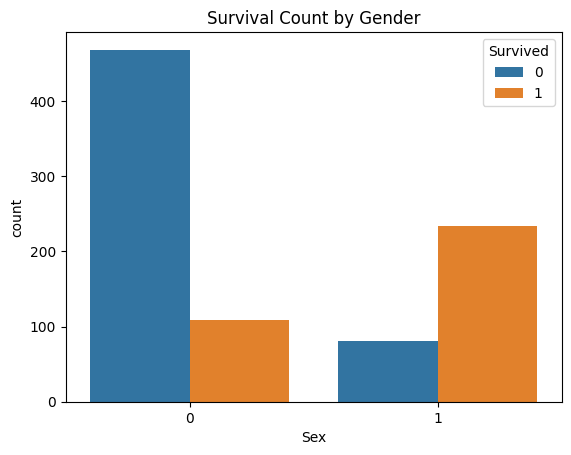

In [9]:
#Visualizing survival rates by gender
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

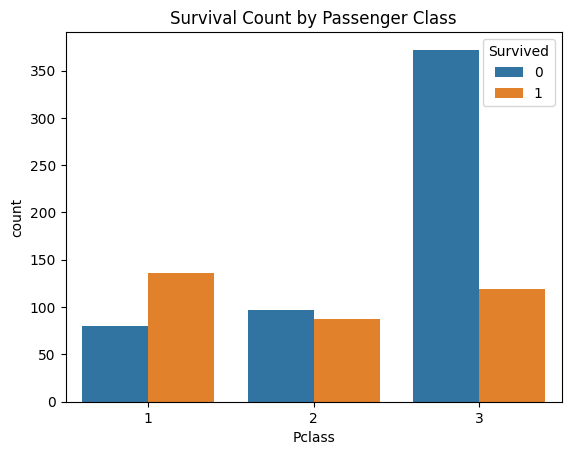

In [10]:
#Visualizing survival rates by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [11]:
#Create a new feature for family size
titanic_df['FamilySize']=titanic_df['SibSp'] + titanic_df['Parch'] + 1


In [12]:

#Optional: Create additional age grouos
# Optional: Create additional age groups
bins = [0, 12, 20, 40, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

In [16]:
from sklearn.model_selection import train_test_split

#Define features and the target variables
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Initialize a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy:.2f}')

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [21]:
from sklearn.metrics import classification_report

# Ensure the model is trained before making predictions
if hasattr(model, 'estimators_'):
	# Redefine y_pred if not already defined
	y_pred = model.predict(X_test)

	# Generate a classification report
	print(classification_report(y_test, y_pred))
else:
	print("Error: The model has not been trained. Please re-run the training cell.")

Error: The model has not been trained. Please re-run the training cell.
